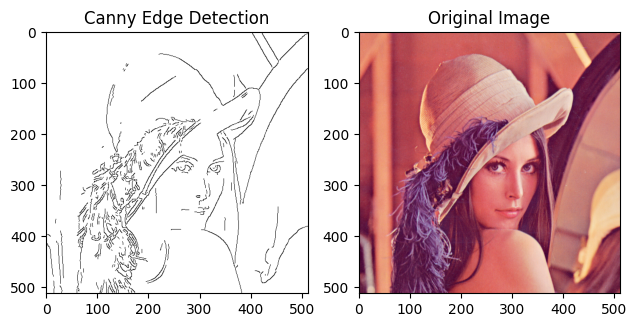

In [18]:
%matplotlib inline
# Canny Method
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image

img    = cv2.imread('lena.png')
#img    = cv2.imread('DDH-184.jpeg')
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_gray = cv2.GaussianBlur(gray, (5, 5), 0)
#threshold1, threshhold2 = 5, 95
threshold1, threshhold2 = 95, 110
r_canny = 255 - cv2.Canny(g_gray, threshold1, threshhold2, apertureSize = 3, L2gradient = True) # <- 255-をつけることで、白黒反転する

fig, axs = plt.subplots(1, 2)
axs[0].imshow(r_canny, cmap='gray')
axs[0].set_title('Canny Edge Detection')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Original Image')
plt.tight_layout()
plt.show()

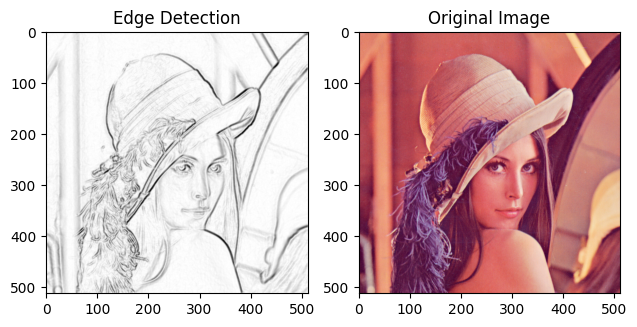

In [19]:
%matplotlib inline
# Sobel Method
import numpy as np
import cv2
import os
from PIL import Image

img    = cv2.imread('lena.png')
#img    = cv2.imread('DDH-184.jpeg')
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Sobel フィルターの適用
sobel_x = cv2.Sobel(g_gray, cv2.CV_32F, dx = 1, dy = 0, ksize = 3)
sobel_y = cv2.Sobel(g_gray, cv2.CV_32F, dx = 0, dy = 1, ksize = 3)

# 勾配の絶対値を計算
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# x, y 方向の勾配を合成
sobel_all = 255 - cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0) # <- 255-をつけることで、白黒反転する

fig, axs = plt.subplots(1, 2)
axs[0].imshow(sobel_all, cmap='gray')
axs[0].set_title('Edge Detection')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Original Image')
plt.tight_layout()
plt.show()

